APS 1 - Grupo 1  
Arthur Moreira Tamm  
Gustavo Oliveira  
Luca Mizrahi  

Importar bibliotecas

In [88]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

# Parte 1

Declarar variáveis

In [89]:
k_al = 240 # [W/mK] - Condutividade térmica do alumínio
T_b = 373 # [K] 100°C - Temperatura da base
T_inf = 298 # [K] 25°C - Temperatura do ambiente
w = 0.24 # [m] 240mm - Largura
t = 0.02 # [m] 20mm - Espessura
L = 0.20 # [m] 200mm - Comprimento
h = 25 # [W/m²K] - Coeficiente de convecção
P = 2*(w+t) # [m] - Perímetro
At = w*t # [m²] - Área da seção transversal
As = 2*(L*t + w*L) + w*t # [m²] - Área da superfície
Ab = w*t # [m²] - Área da base
M = sqrt(h*P*k_al*At*(T_b-T_inf)) # [W/m] - M
m = sqrt(h*P / (k_al*At)) # [1/m] - m

Função de Distribuição de Temperaturas para transferência de calor por convecção

In [90]:
def t_distribution(x, m, L, h, k, T_b, T_inf ):
    numerator = cosh(m*(L-x)) + (h/(m*k))*sinh(m*(L-x))
    denominator = cosh(m*L) + (h/(m*k))*sinh(m*L)
    theta_b = T_b - T_inf
    return T_inf + theta_b * numerator / denominator

1.

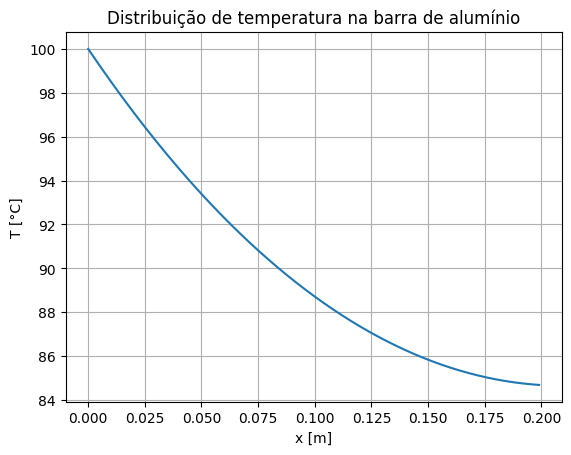

A temperatura na extremidade da barra é de 84.68°C


In [91]:
x_list = np.arange(0, L, 0.001)
T_list = []
for i in range(len(x_list)):
    T = t_distribution(x_list[i], m, L, h, k_al, T_b, T_inf)
    T_list.append(T)

T_celsius_list = [t - 273 for t in T_list]

plt.plot(x_list, T_celsius_list)
plt.xlabel('x [m]')
plt.ylabel('T [°C]')
plt.title('Distribuição de temperatura na barra de alumínio')
plt.grid()
plt.show()

print('A temperatura na extremidade da barra é de {:.2f}°C'.format(T_celsius_list[-1]))

Função de transferência de calor na aleta

In [92]:
def heat_transfer_rate(M, m, L, h, k):
    numerator = sinh(m*L) + (h/(m*k))*cosh(m*L)
    denominator = cosh(m*L) + (h/(m*k))*sinh(m*L)
    return M * numerator / denominator

2.

In [93]:
q = heat_transfer_rate(M, m, L, h, k_al)
print('A taxa de transferência de calor é de {:.2f}W'.format(q))

A taxa de transferência de calor é de 20.32W


Função de eficiência

In [94]:
def efficiency(q, h, As, Tb, Tinf):
    return q / (h*As*(Tb-Tinf))


3.

In [95]:
print('A eficiência do sistema é de {:.2f}%'.format(efficiency(q, h, As, T_b, T_inf)*100))

A eficiência do sistema é de 9.96%


Função de efetividade

In [96]:
def effectiveness(q, h, Ab, Tb, Tinf):
    return q / (h*Ab*(Tb-Tinf))

4.

In [97]:
print('A efetividade do sistema é de {:.2f}'.format(effectiveness(q, h, Ab, T_b, T_inf)))

A efetividade do sistema é de 2.26


5.

Assumindo a hipótese da aleta infinita, a taxa de transferência de calor é igual a M

In [98]:
print('A taxa de transferência de calor para a aleta infinita é de {:.2f}W'.format(M))

A taxa de transferência de calor para a aleta infinita é de 33.51W


6.

In [99]:
print(f'A taxa de transferência de calor para o cenário em que assumimos a hipótese da aleta infinita é {M:.2f} W, \n enquanto que para o cenário em que assumimos a hipótese da aleta finita é {q:.2f} W. Um erro de {M-q/q:.2f}%')

A taxa de transferência de calor para o cenário em que assumimos a hipótese da aleta infinita é 33.51 W, 
 enquanto que para o cenário em que assumimos a hipótese da aleta finita é 20.32 W. Um erro de 32.51%


7.

In [100]:
L_teste = 0.2
q_teste = 1
while(q_teste/M < 0.999):
    q_teste = heat_transfer_rate(M, m, L_teste, h, k_al)
    L_teste = L_teste + 0.001

print('Para que a hipótese da aleta infinita forneça uma medida precisa para a taxa de transferência de calor, \n o comprimento da aleta deve ser maior que {:.2f}m'.format(L_teste))

Para que a hipótese da aleta infinita forneça uma medida precisa para a taxa de transferência de calor, 
 o comprimento da aleta deve ser maior que 1.12m


# Questão 2

#### Parte I

In [101]:
# Valores conhecidos
Ka = 240  # Condutividade térmica do material-padrão (exemplo)
Ta = 75 # Temperatura em X1 do composto A
Tb = 60 # Temperatura em X1 no composto B
Tbase = 100.0  # Temperatura na base (exemplo)
Tinf = 25.0  # Temperatura do fluido (exemplo)


def calcula_condutividade_termica(Ta, Tb, Tbase, Ka, Tinf):
        lna = log((Ta - Tinf)/(Tbase - Tinf))
        lnb = log((Tb - Tinf)/(Tbase - Tinf))
        resposta = ((lna * (-sqrt(Ka)))/(lnb))**2
        return resposta

#### Parte II

In [102]:
resposta = calcula_condutividade_termica(Ta, Tb, Tbase, Ka, Tinf)
print('A condutividade térmica do material-padrão é de {:.2f} W/mK'.format(resposta))

A condutividade térmica do material-padrão é de 67.93 W/mK
